In [3]:
import pandas as pd
import matplotlib.pyplot as plt


The subway data for 2022-2024 is too big for pandas to read. Therefore, need to read the file in chunks and clean in chunks before cleaning can occur and then conctonate the dataframes into one paquet file

In [4]:
# Define the chunk size
chunk_size = 10000


first_chunk = pd.read_csv('c:/A/MTA_Subway_2022_24.csv', chunksize=chunk_size)

first_chunk = next(first_chunk)

In [5]:
first_chunk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transit_timestamp    10000 non-null  object 
 1   transit_mode         10000 non-null  object 
 2   station_complex_id   10000 non-null  object 
 3   station_complex      10000 non-null  object 
 4   borough              10000 non-null  object 
 5   payment_method       10000 non-null  object 
 6   fare_class_category  10000 non-null  object 
 7   ridership            10000 non-null  int64  
 8   transfers            10000 non-null  int64  
 9   latitude             10000 non-null  float64
 10  longitude            10000 non-null  float64
 11  Georeference         10000 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 937.6+ KB


In [6]:
first_chunk.nunique()

transit_timestamp      5369
transit_mode              3
station_complex_id      404
station_complex         404
borough                   5
payment_method            2
fare_class_category      10
ridership               382
transfers               147
latitude                410
longitude               410
Georeference            414
dtype: int64

In [7]:
first_chunk.isnull()

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df = first_chunk
# Change data types of all object columns to category except for 'Georeference'
for col in df.select_dtypes(include='object').columns:
    if col != 'Georeference':
        df[col] = df[col].astype('category')

# Display the data types to verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   transit_timestamp    10000 non-null  category
 1   transit_mode         10000 non-null  category
 2   station_complex_id   10000 non-null  category
 3   station_complex      10000 non-null  category
 4   borough              10000 non-null  category
 5   payment_method       10000 non-null  category
 6   fare_class_category  10000 non-null  category
 7   ridership            10000 non-null  int64   
 8   transfers            10000 non-null  int64   
 9   latitude             10000 non-null  float64 
 10  longitude            10000 non-null  float64 
 11  Georeference         10000 non-null  object  
dtypes: category(7), float64(2), int64(2), object(1)
memory usage: 698.9+ KB


In [9]:
print(df.head())

        transit_timestamp transit_mode station_complex_id  \
0  06/09/2023 12:00:00 AM       subway                359   
1  05/03/2023 12:00:00 PM       subway                359   
2  08/20/2023 03:00:00 PM       subway                359   
3  06/06/2023 11:00:00 PM       subway                359   
4  08/10/2023 11:00:00 AM       subway                359   

                      station_complex   borough payment_method  \
0  Flatbush Av-Brooklyn College (2,5)  Brooklyn      metrocard   
1  Flatbush Av-Brooklyn College (2,5)  Brooklyn      metrocard   
2  Flatbush Av-Brooklyn College (2,5)  Brooklyn      metrocard   
3  Flatbush Av-Brooklyn College (2,5)  Brooklyn      metrocard   
4  Flatbush Av-Brooklyn College (2,5)  Brooklyn      metrocard   

                fare_class_category  ridership  transfers   latitude  \
0      Metrocard - Unlimited 30-Day          4          0  40.632835   
1              Metrocard - Students         58          4  40.632835   
2  Metrocard - Senio

In [10]:
# List all unique entries in the fare_class_category column
unique_fare_classes = df['fare_class_category'].unique()

# Display the unique fare classes
print(unique_fare_classes)

['Metrocard - Unlimited 30-Day', 'Metrocard - Students', 'Metrocard - Seniors & Disability', 'Metrocard - Other', 'Metrocard - Full Fare', 'OMNY - Full Fare', 'Metrocard - Unlimited 7-Day', 'OMNY - Seniors & Disability', 'Metrocard - Fair Fare', 'OMNY - Other']
Categories (10, object): ['Metrocard - Fair Fare', 'Metrocard - Full Fare', 'Metrocard - Other', 'Metrocard - Seniors & Disability', ..., 'Metrocard - Unlimited 7-Day', 'OMNY - Full Fare', 'OMNY - Other', 'OMNY - Seniors & Disability']


In [11]:
df['transit_mode'].unique()

['subway', 'staten_island_railway', 'tram']
Categories (3, object): ['staten_island_railway', 'subway', 'tram']

In [12]:
df['borough'].unique()

['Brooklyn', 'Queens', 'Bronx', 'Manhattan', 'Staten Island']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

In [13]:
df['payment_method'].unique()

['metrocard', 'omny']
Categories (2, object): ['metrocard', 'omny']

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Plot the frequency of values for each categorical column
plt.figure(figsize=(15, 10))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  # Adjust subplot grid size as needed
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [14]:
df = df.drop(columns=[  'payment_method', 'Georeference', 'transfers', 'transit_mode', 'fare_class_category', 'station_complex'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   transit_timestamp   10000 non-null  category
 1   station_complex_id  10000 non-null  category
 2   borough             10000 non-null  category
 3   ridership           10000 non-null  int64   
 4   latitude            10000 non-null  float64 
 5   longitude           10000 non-null  float64 
dtypes: category(3), float64(2), int64(1)
memory usage: 473.8 KB


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   transit_timestamp   10000 non-null  category
 1   station_complex_id  10000 non-null  category
 2   borough             10000 non-null  category
 3   ridership           10000 non-null  int64   
 4   latitude            10000 non-null  float64 
 5   longitude           10000 non-null  float64 
dtypes: category(3), float64(2), int64(1)
memory usage: 473.8 KB


In [16]:
df.head()

,transit_timestamp,station_complex_id,borough,ridership,latitude,longitude
0,06/09/2023 12:00:00 AM,359,Brooklyn,4,40.632835,-73.947639
1,05/03/2023 12:00:00 PM,359,Brooklyn,58,40.632835,-73.947639
2,08/20/2023 03:00:00 PM,359,Brooklyn,12,40.632835,-73.947639
3,06/06/2023 11:00:00 PM,359,Brooklyn,1,40.632835,-73.947639
4,08/10/2023 11:00:00 AM,359,Brooklyn,14,40.632835,-73.947639


In [17]:
# Sort by the 'date' column
sorted_df = df.sort_values(by='transit_timestamp')

# Display the top rows
print(sorted_df.head())

           transit_timestamp station_complex_id   borough  ridership  \
7790  01/01/2023 02:00:00 PM                359  Brooklyn         12   
3789  01/01/2023 03:00:00 AM                359  Brooklyn          1   
4497  01/01/2023 03:00:00 PM                359  Brooklyn         12   
8810  01/01/2023 04:00:00 AM                359  Brooklyn          8   
860   01/01/2023 04:00:00 AM                359  Brooklyn          2   

       latitude  longitude  
7790  40.632835 -73.947639  
3789  40.632835 -73.947639  
4497  40.632835 -73.947639  
8810  40.632835 -73.947639  
860   40.632835 -73.947639  


In [18]:
df['longitude'] = df['longitude'].astype('float32')
df['latitude'] = df['latitude'].astype('float32')
df['ridership'] = df['ridership'].astype('int16')

In [19]:
min_ridership = df['ridership'].min()

# Get the maximum value in the 'ridership' column
max_ridership = df['ridership'].max()

print(f"Minimum ridership: {min_ridership}")
print(f"Maximum ridership: {max_ridership}")

Minimum ridership: 1
Maximum ridership: 2780


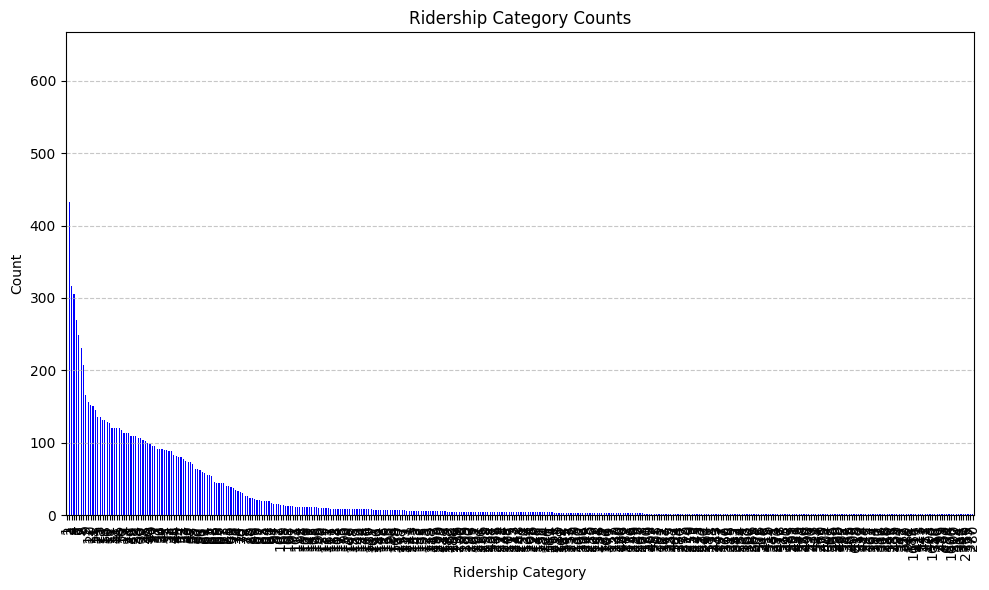

In [20]:
ridership_counts = df['ridership'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
ridership_counts.plot(kind='bar', color='b')

# Add title and labels
plt.title('Ridership Category Counts')
plt.xlabel('Ridership Category')
plt.ylabel('Count')

# Display the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [21]:
df.tail(20)

,transit_timestamp,station_complex_id,borough,ridership,latitude,longitude
9980,08/30/2023 05:00:00 PM,359,Brooklyn,75,40.632835,-73.947639
9981,07/25/2023 01:00:00 AM,359,Brooklyn,3,40.632835,-73.947639
9982,02/04/2023 04:00:00 AM,359,Brooklyn,10,40.632835,-73.947639
9983,01/17/2023 12:00:00 PM,359,Brooklyn,43,40.632835,-73.947639
9984,08/23/2023 11:00:00 PM,359,Brooklyn,4,40.632835,-73.947639
9985,05/04/2023 10:00:00 AM,359,Brooklyn,65,40.632835,-73.947639
9986,03/01/2023 03:00:00 PM,359,Brooklyn,61,40.632835,-73.947639
9987,02/25/2023 08:00:00 AM,359,Brooklyn,48,40.632835,-73.947639
9988,03/06/2023 08:00:00 AM,359,Brooklyn,121,40.632835,-73.947639
9989,08/23/2023 06:00:00 PM,359,Brooklyn,39,40.632835,-73.947639


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   transit_timestamp   10000 non-null  category
 1   station_complex_id  10000 non-null  category
 2   borough             10000 non-null  category
 3   ridership           10000 non-null  int16   
 4   latitude            10000 non-null  float32 
 5   longitude           10000 non-null  float32 
dtypes: category(3), float32(2), int16(1)
memory usage: 337.1 KB


In [29]:
df['normalized_ridership'] = df.groupby('transit_timestamp')['ridership'].transform(lambda x: x / x.sum())

# Create an index by combining normalized ridership values
df['ridership_index'] = df['normalized_ridership']
df.head()

C:\Users\Kevin\AppData\Local\Temp\ipykernel_5580\3288413819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['normalized_ridership'] = df.groupby('transit_timestamp')['ridership'].transform(lambda x: x / x.sum())


,transit_timestamp,station_complex_id,borough,ridership,latitude,longitude,normalized_ridership,ridership_index
0,06/09/2023 12:00:00 AM,359,Brooklyn,4,40.632835,-73.947639,1.000000,1.000000
1,05/03/2023 12:00:00 PM,359,Brooklyn,58,40.632835,-73.947639,0.143564,0.143564
2,08/20/2023 03:00:00 PM,359,Brooklyn,12,40.632835,-73.947639,1.000000,1.000000
3,06/06/2023 11:00:00 PM,359,Brooklyn,1,40.632835,-73.947639,1.000000,1.000000
4,08/10/2023 11:00:00 AM,359,Brooklyn,14,40.632835,-73.947639,1.000000,1.000000


In [24]:
df.tail()

,transit_timestamp,station_complex_id,borough,ridership,latitude,longitude,normalized_ridership,ridership_index
9995,11/30/2023 02:00:00 PM,359,Brooklyn,52,40.632835,-73.947639,1.000000,1.000000
9996,11/02/2023 01:00:00 PM,359,Brooklyn,72,40.632835,-73.947639,1.000000,1.000000
9997,01/12/2024 03:00:00 AM,108,Queens,2,40.711395,-73.889603,0.055556,0.055556
9998,07/11/2023 05:00:00 AM,359,Brooklyn,57,40.632835,-73.947639,0.329480,0.329480
9999,01/12/2024 04:00:00 AM,49,Brooklyn,6,40.625038,-73.960800,0.133333,0.133333


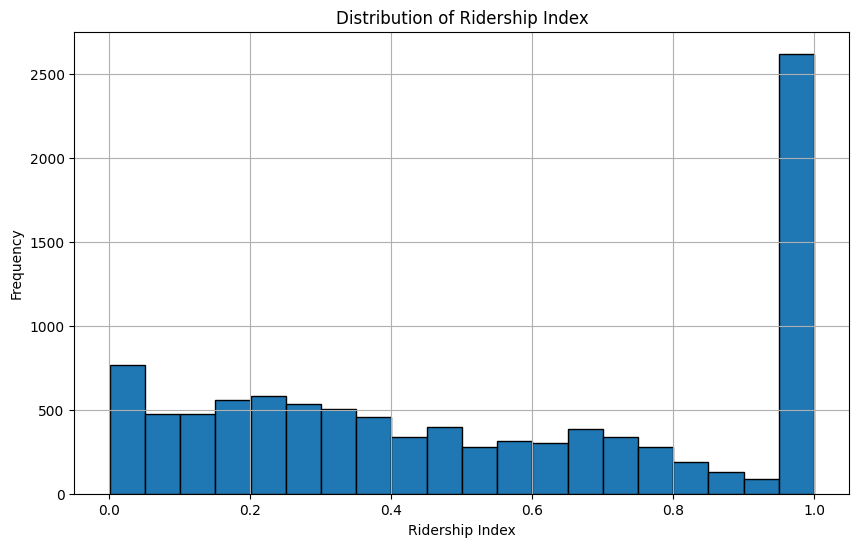

In [30]:
plt.figure(figsize=(10, 6))
df['ridership_index'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Ridership Index')
plt.xlabel('Ridership Index')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [33]:
df.to_csv('subway_sample_index.csv')